# Laboratory #01 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

**Remember this is a graded exercise.**

For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color

# drive folder with the extracted zip files
DATA_FOLDER = '.'

## Channels and color spaces

**Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.
*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*


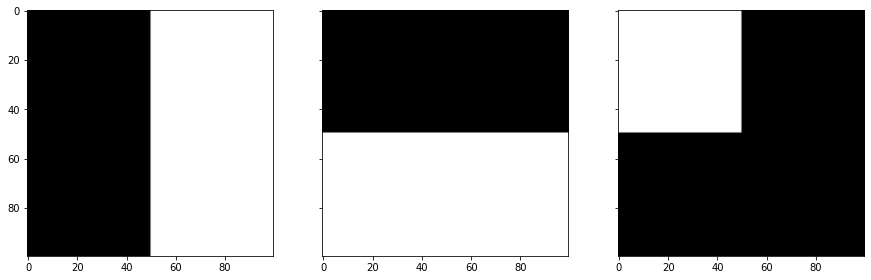

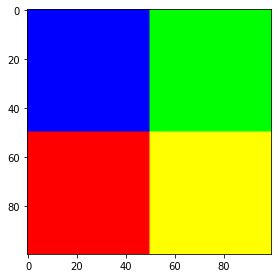

In [2]:
# solution
# the three figures can be created from one and then performing operations such 
# like this:
# - the first one is just a concatenation of half black half white pixels
# - the second one is the first one transposed
# - the third one is the nor of the other two images if are seen as bool matrix

image1 = np.concatenate((np.zeros((100, 50)), np.ones((100, 50))), axis=1)
image2 = image1.copy().T
image3 = 1 - (image1.astype(np.bool) + image2.astype(np.bool)).astype(np.uint8)
f, ax = plt.subplots(1, 3, True, True, figsize=(15,9))
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(image2, cmap='gray')
ax[2].imshow(image3, cmap='gray')
plt.show()

# for creating the 4 squares we must see that yellow = [255, 255, 0] so, to 
# create we need green in in the right side, red in the bottom and blue only on 
# the top left square so it is a matter of concatenating the tree images and 
# format them so that imshow shows it correctly
rgbimage = np.array([image1, image2, image3]).swapaxes(2, 0)
plt.figure(figsize=(4.5,4.5))
plt.imshow(rgbimage)
plt.show()

**Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using matplotlib subplot.
*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where the everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.



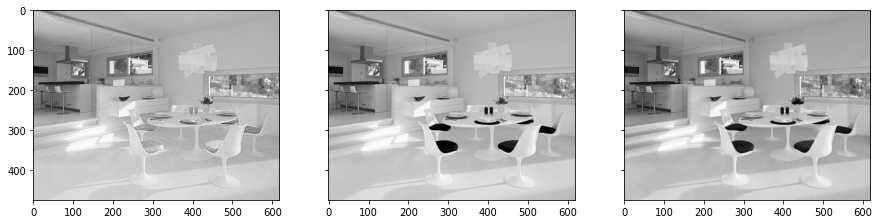

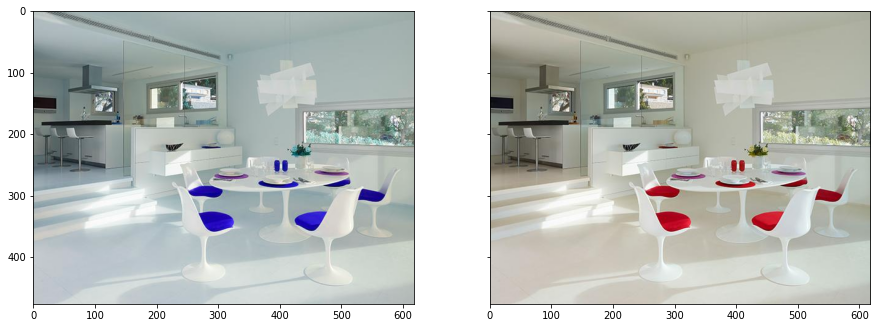

In [3]:
# solution
chair_image = io.imread(DATA_FOLDER + '/images/sillas.jpg')

# grayscale plot of each channel of the image
f, ax = plt.subplots(1, 3, True, True, figsize=(15,9))
ax[0].imshow(chair_image[:,:,0], cmap='gray')
ax[1].imshow(chair_image[:,:,1], cmap='gray')
ax[2].imshow(chair_image[:,:,2], cmap='gray')
plt.show()

# To change the red parts to blue there are two approaches, to add the red and 
# blue channels and then remove the info in the red channel or to change the base
# over which we are operating, and it happens to be that adding 90 to the hue 
# value of the image makes everything red blue and it does so way more smooth 
# than swapping channels.
rgb = chair_image.copy()
tmp = rgb[:,:,0].copy()
rgb[:,:,0] = rgb[:,:,2]
rgb[:,:,2] = tmp
f, ax = plt.subplots(1, 2, True, True, figsize=(15,9))
ax[0].imshow(rgb)
ax[1].imshow(chair_image)
plt.show()

# Image Manipulation

**Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


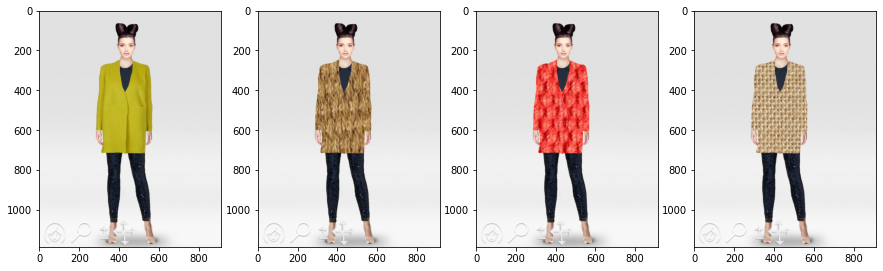

In [4]:
# solution
from skimage.transform import resize

# load images
coat = io.imread(DATA_FOLDER + "/images/coat.png")
model = io.imread(DATA_FOLDER + "/images/model.png")

# convert to 3channel
coat = color.rgba2rgb(coat)
model = color.rgba2rgb(model)

# load textures
textures = [io.imread(DATA_FOLDER + "/images/texture.png"),
            io.imread(DATA_FOLDER + "/images/texture2.png"),
            io.imread(DATA_FOLDER + "/images/texture3.jpg")]

# resize texture to fit model picture
textures = list(map(lambda texture: resize(texture, model.shape), textures))

# create mask in the green channel
coat_mask = np.nonzero(coat[:,:,1])

# replace and plot the indexes in the mask by the texture info
f, ax = plt.subplots(1, 4, figsize=(15, 5))
for idx, texture in enumerate([coat] + textures):
  model[coat_mask] = texture[coat_mask]
  ax[idx].imshow(model)
f.show()

# Contrast Enhancement

**Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.
*   Vary the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.



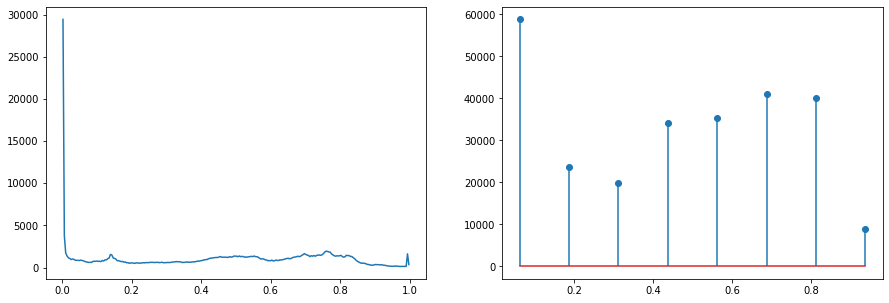

In [5]:
# solution
# load data
astronaut_rgb = data.astronaut()

# rgb to gray
astronaut_gray = color.rgb2gray(astronaut_rgb)

# histogram computation, as default and with 8 bins
hist, bin_centers = exposure.histogram(astronaut_gray)
hist_q, bin_centers_q = exposure.histogram(astronaut_gray, nbins=8)

# plot
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(bin_centers, hist)
ax[1].stem(bin_centers_q, hist_q, use_line_collection=True)
plt.show()




*   What happens when you change your bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

When you change the bin count you are efectively calculating the histogram of a quantized image. The samples that are in between the quantized bins are computed as if they were in the nearest bin color. When the bin count is low it does not represent the actual image but an approximation of the histogram itself. The correct bin count should be the number of possible levels that the values in an image can take. in this case 2**8.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in the same plot).


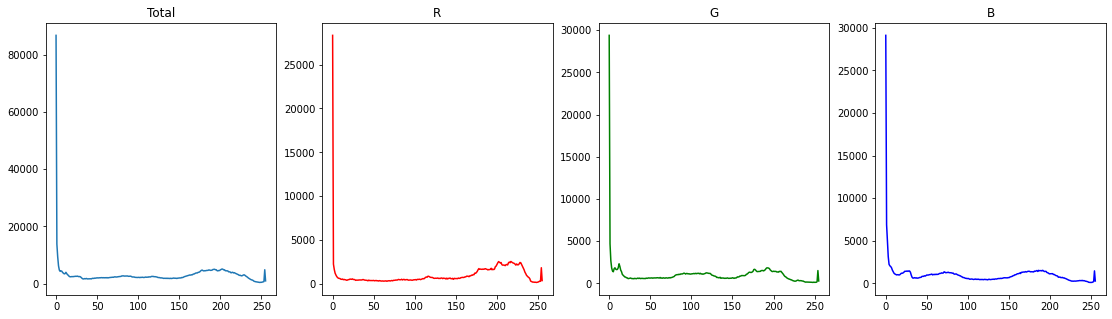

In [6]:
#solution
hist, center_bins = exposure.histogram(astronaut_rgb)
f, ax = plt.subplots(1, 4, figsize=(19, 5))
ax[0].set_title('Total')
ax[0].plot(center_bins, hist)
for idx, (color_str, color_image) in enumerate(zip("rgb", astronaut_rgb.swapaxes(0, 2))):
  hist, center_bins = exposure.histogram(color_image)
  ax[idx + 1].set_title(color_str.upper())
  ax[idx + 1].plot(center_bins, hist, color=color_str)
f.show()

**Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



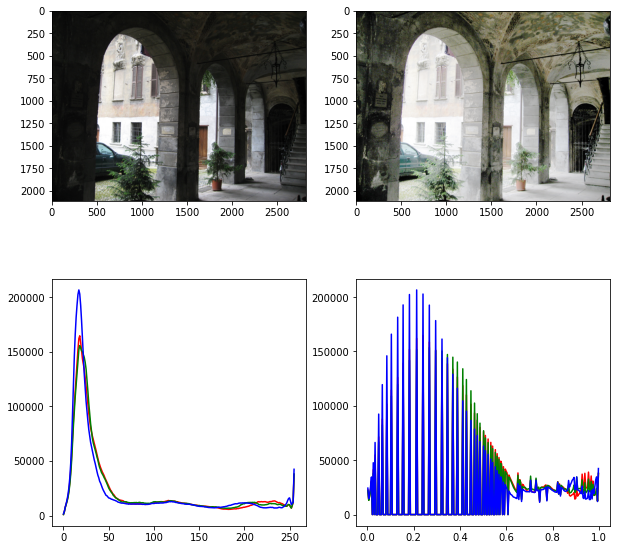

In [7]:
# solution

# function developed for the next task, but I used it here as well as it was also needed
def plot_2x2_image_histogram(image1, image2):
  """
  plots a 2x2 sublot with the images and histograms of the images for each of
  channels in the images.
  """
  source_hists = []
  target_hists = []

  # if image is grayscale, add an empty axis
  image1_ = image1.copy() if len(image1.shape) > 2 else image1.copy()[:, :, np.newaxis]
  image2_ = image2.copy() if len(image2.shape) > 2 else image2.copy()[:, :, np.newaxis]

  # color labels for plot
  colors = "rgbk"[:image1_.shape[2]]

  # compute histograms for each channel
  for sub_image in np.swapaxes(image1_, 0, 2):
    source_hists.append(exposure.histogram(sub_image))
  for sub_image in np.swapaxes(image2_, 0, 2):
    target_hists.append(exposure.histogram(sub_image))
  
  # plot images and histograms
  f, ax = plt.subplots(2, 2, figsize=(10, 10))
  ax[0][0].imshow(image1)
  for (hist, centers), color_ in zip(source_hists, colors):
    ax[1][0].plot(centers, hist, color_)
  ax[0][1].imshow(image2)
  for (hist, centers), color_ in zip(target_hists, colors):
    ax[1][1].plot(centers, hist, color_)
  plt.show()

# read data
aquatermi_lowcontrast = io.imread(DATA_FOLDER + '/images/aquatermi_lowcontrast.jpg')

# equalise histogram
equalised_image = exposure.equalize_hist(aquatermi_lowcontrast)

# plot
plot_2x2_image_histogram(aquatermi_lowcontrast, equalised_image)


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

while cdf and interpolation try to flatten the histogram as much as posible, linear contrast stretch only will linialrly map the values of the original histogram to the target one. 

**Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



(3, 255) -> (0, 255)


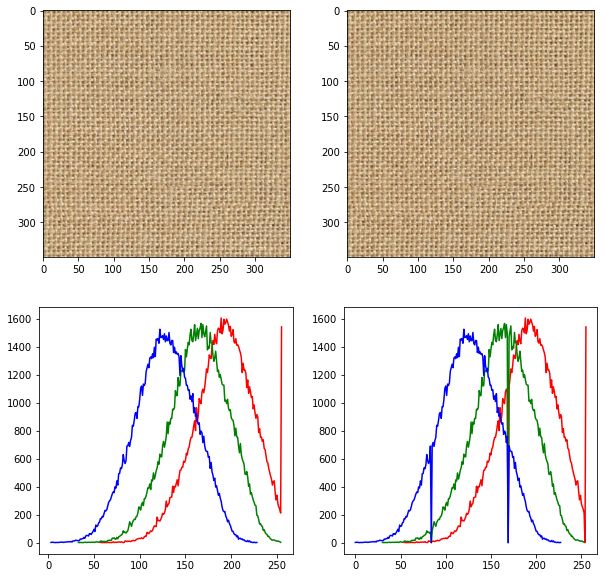

In [8]:
# solution
def linear_contrast_stretch(image, bin_count=None):
  """
  performs a linear scaling operation by, normalizing the minimum value to 0
  scaling the range by (max_out - min_out) / (max_in - min_in) and then adding
  min_out value to restore the desired range.
  """
  # variable definitions
  min_in = image.min()
  max_in = image.max()
  min_out = 0
  if bin_count is None and (image.dtype.kind in ("u", "i")):
    max_out = 2**(8*image.dtype.alignment) - 1
  elif bin_count is not None:
    max_out = int(bin_count)
  else:
    raise ValueError("image datatype should be int or bin_count must be specified")
    
  range_ratio = float(max_out - min_out) / float(max_in - min_in)

  # print for info
  print(f"({min_in}, {max_in}) -> ({min_out}, {max_out})")

  # compute and return operation
  return (((image - min_in) * range_ratio) + min_out).astype(image.dtype)

# same one I used before
def plot_2x2_image_histogram(image1, image2):
  """
  plots a 2x2 sublot with the images and histograms of the images for each of
  channels in the images.
  """
  source_hists = []
  target_hists = []

  # if image is grayscale, add an empty axis
  image1_ = image1.copy() if len(image1.shape) > 2 else image1.copy()[:, :, np.newaxis]
  image2_ = image2.copy() if len(image2.shape) > 2 else image2.copy()[:, :, np.newaxis]

  # color labels for plot
  colors = "rgbk"[:image1_.shape[2]]

  # compute histograms for each channel
  for sub_image in np.swapaxes(image1_, 0, 2):
    source_hists.append(exposure.histogram(sub_image))
  for sub_image in np.swapaxes(image2_, 0, 2):
    target_hists.append(exposure.histogram(sub_image))
  
  # plot images and histograms
  f, ax = plt.subplots(2, 2, figsize=(10, 10))
  ax[0][0].imshow(image1)
  for (hist, centers), color_ in zip(source_hists, colors):
    ax[1][0].plot(centers, hist, color_)
  ax[0][1].imshow(image2)
  for (hist, centers), color_ in zip(target_hists, colors):
    ax[1][1].plot(centers, hist, color_)
  plt.show()

# read image
image = io.imread(DATA_FOLDER + '/images/texture3.jpg')

# compute transform
image2 = linear_contrast_stretch(image)

#plot two images and their histograms
plot_2x2_image_histogram(image, image2)


# Filters

**Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.
*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter.
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.



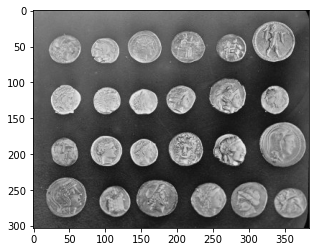

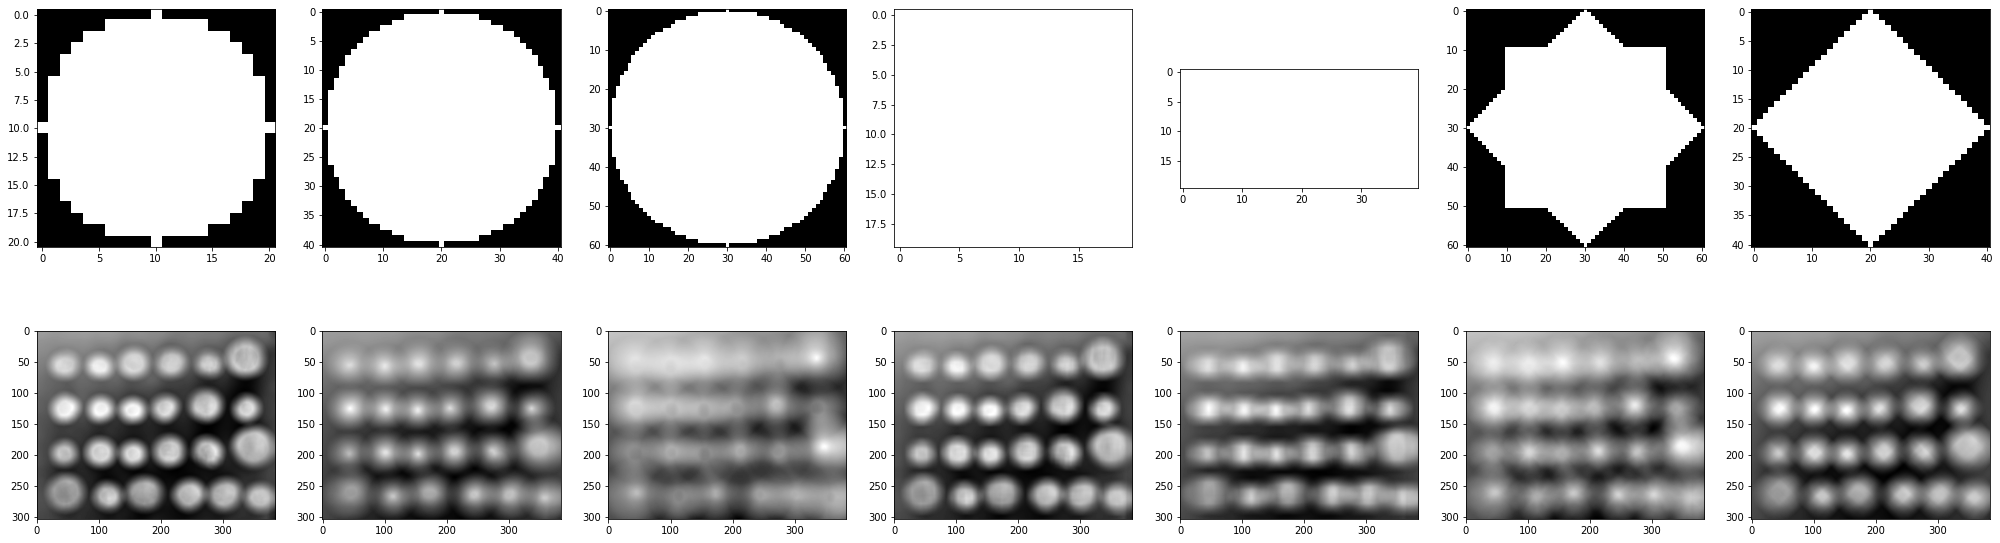

In [9]:
# solution

# load data
coins_image = data.coins()

plt.imshow(coins_image, cmap='gray')
#define selem objects
selem_objects = [
    morphology.selem.disk(10),
    morphology.selem.disk(20),
    morphology.selem.disk(30),
    morphology.selem.square(20),
    morphology.selem.rectangle(20, 40),
    morphology.selem.star(20),
    morphology.selem.diamond(20)
]

# compute mean with each object
mean_images = [filters.rank.mean(coins_image, selem_object) for selem_object in selem_objects]

# plot each pair
f, ax = plt.subplots(2, len(selem_objects), figsize=(35, 10))
for idx, (selem_image, mean_image) in enumerate(zip(selem_objects, mean_images)):
    ax[0][idx].imshow(selem_image, cmap='gray', vmin=0, vmax=1)
    ax[1][idx].imshow(mean_image, cmap='gray')
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

As the radius gets bigger, the area that is being averaged increases and the image becomes blurrier.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

As the coins are circular, when the mean operation is performed with a circular kernel, the shape is preserved way better and depending on the filter it becomes more apparent that the mismatch between the shapes in the image and the shape of the filters causes leakage between the coins, making the image less defined.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

my guess is that if the image suffers from random gaussian noise, the gaussian averager filter would get rid of it more effectively as the value of a given pixel is a weighted sum on all the values of the image where the coefficients follow a 2D-gaussian distribution centered in each pixel. However, when the desired result is lose as little as possible of the shape of the objects, a regular averager with a defined contour should be used. 



---

## **End of P1: Image operators and filters**
